In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('/Users/trenton/Data Analysis Notebook/OnePieceArcs.csv')

In [15]:
df['Manga%'] = df['Manga%'].astype(str)
df['Manga%'] = df['Manga%'].str.rstrip("%").astype(float)/100

df['Anime%'] = df['Anime%'].astype(str)
df['Anime%'] = df['Anime%'].str.rstrip("%").astype(float)/100

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Arc                   51 non-null     object 
 1   Start onChapter       51 non-null     int64  
 2   TotalChapters         51 non-null     int64  
 3   TotalPages            51 non-null     int64  
 4   Manga%                51 non-null     float64
 5   Start onEpisode       51 non-null     int64  
 6   TotalEpisodes         51 non-null     int64  
 7   TotalMinutes(avg 24)  51 non-null     int64  
 8   Anime%                51 non-null     float64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.7+ KB


1. Plot the Manga Percent and Anime Percent for each Arc as a stacked bar chart.

Text(0.5, 1.0, 'Percentage of Manga and Anime')

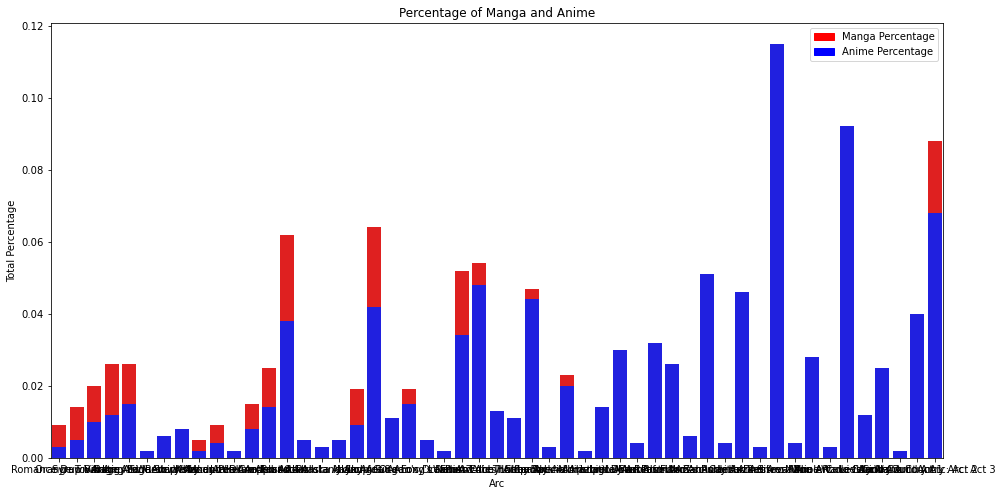

In [31]:
plt.figure(figsize = (16,8))
sns.barplot( data=df, x=df.Arc, y= df['Manga%'] ,ci=False, color="red")
sns.barplot( data=df, x=df.Arc, y= df['Anime%'], ci=False, color="blue")
top=mp.Patch(color="red", label="Manga Percentage")
bottom=mp.Patch(color="blue", label="Anime Percentage")
plt.legend(handles=[top,bottom])
plt.ylabel("Total Percentage")
plt.title("Percentage of Manga and Anime")

2. Plot the total pages vs total minutes of the anime for each arc as a scatter plot.

Text(0.5, 1.0, 'Total Pages VS Total Minutes')

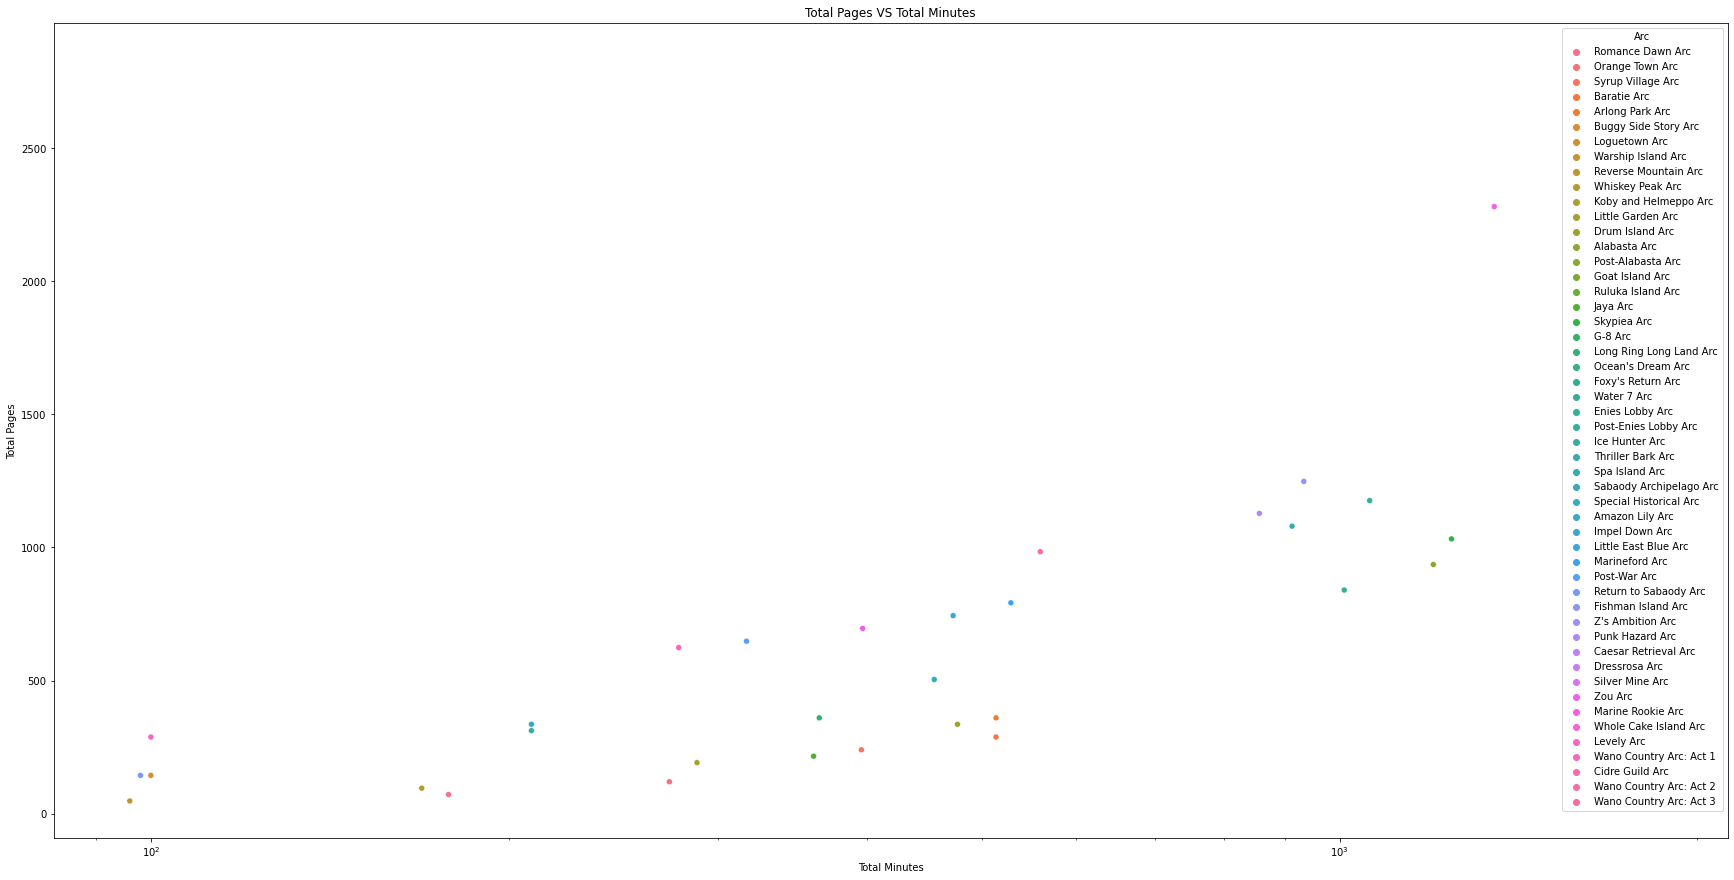

In [24]:
plt.figure(figsize = (30,15))

g = sns.scatterplot(data=df, x="TotalPages", y=df['TotalMinutes(avg 24)'], hue="Arc")
g.set(xscale="log")
plt.ylabel("Total Pages")
plt.xlabel("Total Minutes")
plt.title("Total Pages VS Total Minutes")

3. What is the average number of chapters in arcs after the time skip(episode 516)

In [25]:
ats = df[df["Start onEpisode"] > 516]
ats.TotalChapters.mean()

30.6

4. Which parts of the anime are filler arcs(They are not present in the manga, but the are in the anime)

In [27]:
filler_Arcs = df.loc[df['Manga%'] == 0, :]
filler_Arcs

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
5,Buggy Side Story Arc,0,0,0,0.0,46,2,48,0.002
7,Warship Island Arc,0,0,0,0.0,54,8,192,0.008
10,Koby and Helmeppo Arc,0,0,0,0.0,68,2,48,0.002
14,Post-Alabasta Arc,0,0,0,0.0,131,5,120,0.005
15,Goat Island Arc,0,0,0,0.0,136,3,72,0.003
16,Ruluka Island Arc,0,0,0,0.0,139,5,120,0.005
19,G-8 Arc,0,0,0,0.0,196,11,264,0.011
21,Ocean's Dream Arc,0,0,0,0.0,220,5,120,0.005
22,Foxy's Return Arc,0,0,0,0.0,225,2,48,0.002
26,Ice Hunter Arc,0,0,0,0.0,326,11,264,0.011


5. For each arc what episode does it start on verses what chapter does it start on?

<AxesSubplot:xlabel='Arc'>

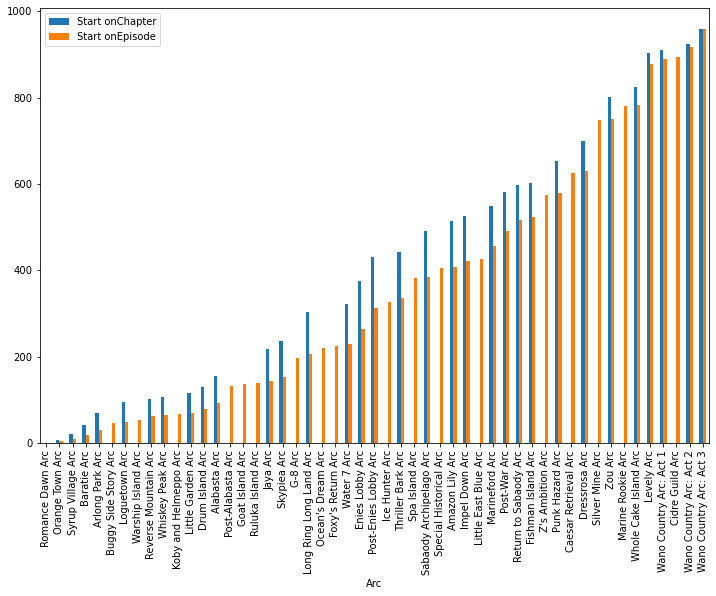

In [33]:
df.plot(x="Arc", y=["Start onChapter", "Start onEpisode"], kind="bar", figsize=(12, 8))

6. What is the total number of chapters versus episodes?

<AxesSubplot:xlabel='TotalEpisodes', ylabel='TotalChapters'>

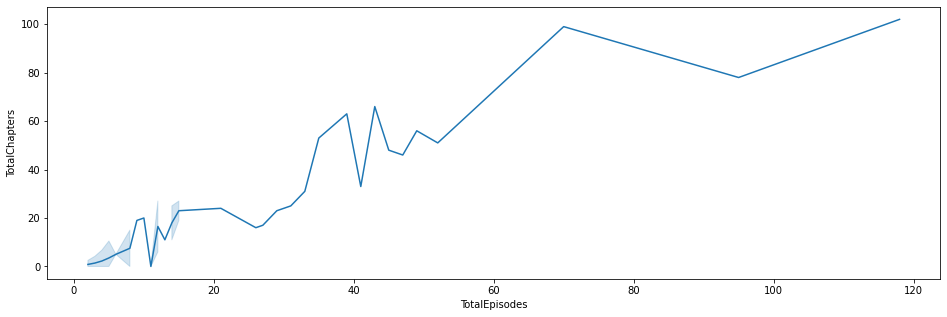

In [43]:
plt.figure(figsize = (16,5))

sns.lineplot(data=df,x='TotalEpisodes',y ='TotalChapters')

7. What is the frequency distrubution of the percentage of the anime an arc takes up?

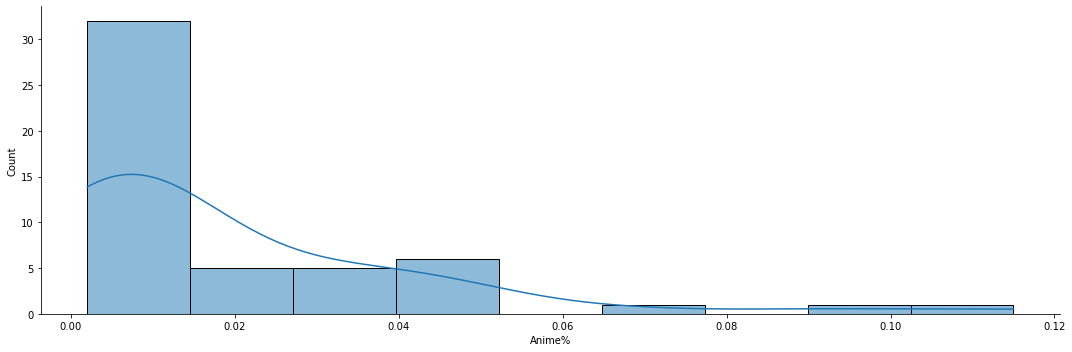

In [44]:
sns.displot(data=df,x='Anime%',kde=True,aspect=3)

8. Which arc takes the most amount of time to watch?

In [45]:
max_episode = df[df['TotalEpisodes'] == df['TotalEpisodes'].max()]

max_watchTime = df[df['TotalMinutes(avg 24)'] == df['TotalMinutes(avg 24)'].max()]
print(f"{max_episode.iloc[0].values[0]} has highest maximum watch Time: {max_episode.iloc[0].values[-2]} minutes")

Dressrosa Arc has highest maximum watch Time: 2832 minutes
